# Introduction

This is the practical module for the data visualization course. In this course we will learn to create different types of charts and plots to display data of different sources and in different scenarios with different tools using Python.

## What we will cover in these practices
1. Matplotlib basic plots
- Line plots
- Histograms

  Tools: `matplotlib`
2. More matplotlib
- Bar plots
- Pie plots
- Box plots

  Tools: `matplotlib`
3. Python visualization landscape
- Scatterplot
- Python visualization landscape
- Animations with plotly
- "Big data" visualization

  Tools: `matplotlib`, `plotly`, `bokeh`

4. More Charts
- Waffle chart
- Word cloud
- Heatmap

  Toolds: `matplotlib`, `plotly`

5. Web dashboard
- Build a dashboard with Bokeh

  Tools: `bokeh`

# Lab 1

### Contents:
- Pandas DataFrame
- Line Plot
- Matplotlib subplots
- Two Y-axis plot
- Histograms

### Pandas Dataframe

Installation: `pip install pandas` or `conda install pandas`

Dataframe: A dataframe is data structure that contains a "table". 

There are multiple ways to create a Dataframe:
- from a csv file
- from a json
- from sql database
- from arrays
- etc

A Dataframe allows us to query our data and perform operations like sum, mean, joins, etc.

In [17]:
import pandas as pd
import datetime

You can go to the 10 minute pandas guide: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
to learn how to query and perform operations on dataframes

Here we read a csv file and then use `DataFrame.head()` to take a look at the first five elements of the dataframe

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/dirodriguezm/practicas_diploma/master/Practica1/monthly_csv.csv")
data.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


Now let's filter out the dataframe to only contain meassurements from GCAG source and then, convert the date string to a datetime object

Datetime is a python library to handle dates and it is compatible with matplotlib.

In [16]:
data.Date = pd.to_datetime(data.Date)
gcag = data[data.Source == "GCAG"]
gcag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Source  1644 non-null   object        
 1   Date    1644 non-null   datetime64[ns]
 2   Mean    1644 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.4+ KB


# Matplotlib
Matplotlib is one of the most popular data visualization tools for Python. It is used widely in multiple applications and it is the foundation for many other tools for visualization.

It is relatively easy to use and very customizable for more complex tasks. 

It is open source, with a very detailed documentation and actively maintained by the community. There's also losts of tutorials and other materials in the web to learn and solve questions.

In [21]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### LinePlots

Let's create our first lineplot using data from our dataframe.

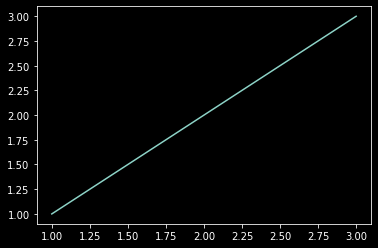

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot([1,2,3], [1,2,3])

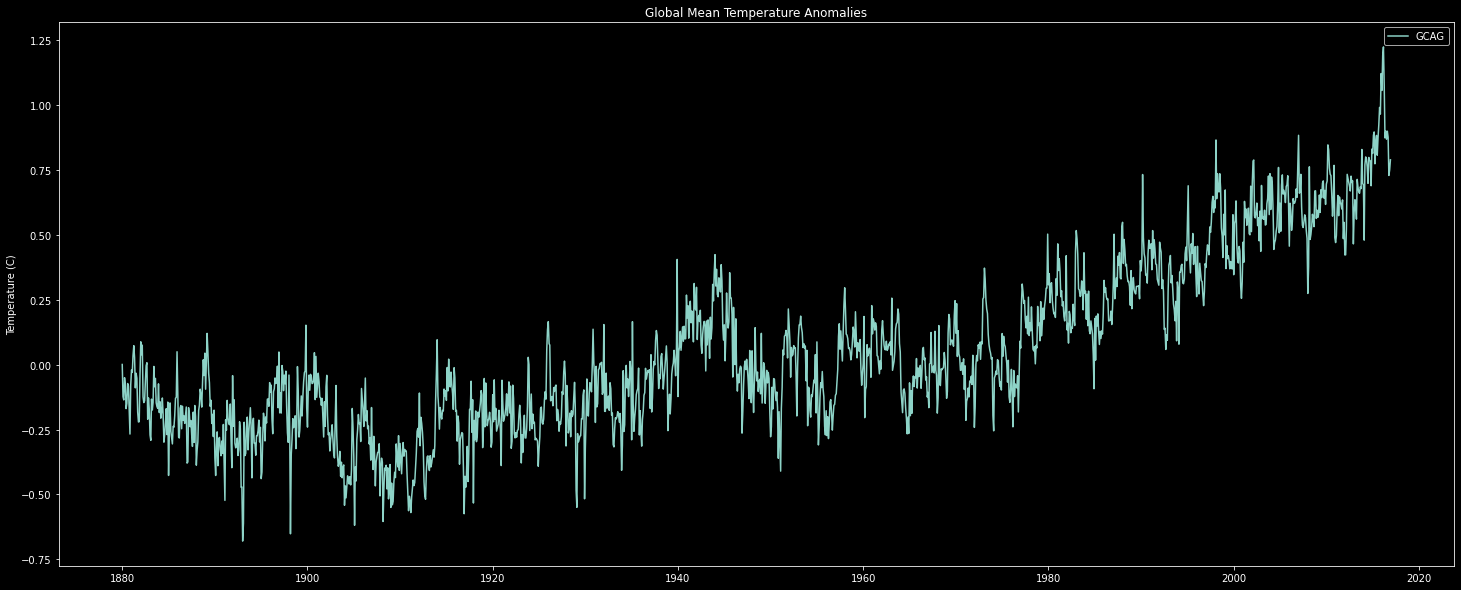

In [23]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(gcag.Date, gcag.Mean)
ax.legend(['GCAG'])
plt.ylabel("Temperature (C)")
plt.title("Global Mean Temperature Anomalies")
plt.show()

Let's break down what the code above does:

`plt.subplots()` creates a Figure and an Axes object. Figure is the object that contains all of our visuals, title, labels, etc and it can contain many Axes, wich are the objects that contain our actual visual elements. like the line plot.

When we call `ax.plot()` we are creating a line plot that will be added to our `ax` object. `ax.plot()` takes at least two array-like arguments. The first being the data for the X axis and the second is the data for the Y axis. In our case these are the dates and mean columns from the dataframe.

Now with `ax.legend()` we define a name for our data. In this case there is only one dataset wich is the GCAG station temperatures.

Then `plt.ylabel()` sets the label for Y axis and `plt.title()` sets the graph title.

Finally to show everything we have added to our figure, we have to call `plt.show()`

#### We can also plot more datasets in the same plot. Let's add the data from GISTEMP station to check if they are similar.

In [24]:
gistemp = data[data.Source == "GISTEMP"]

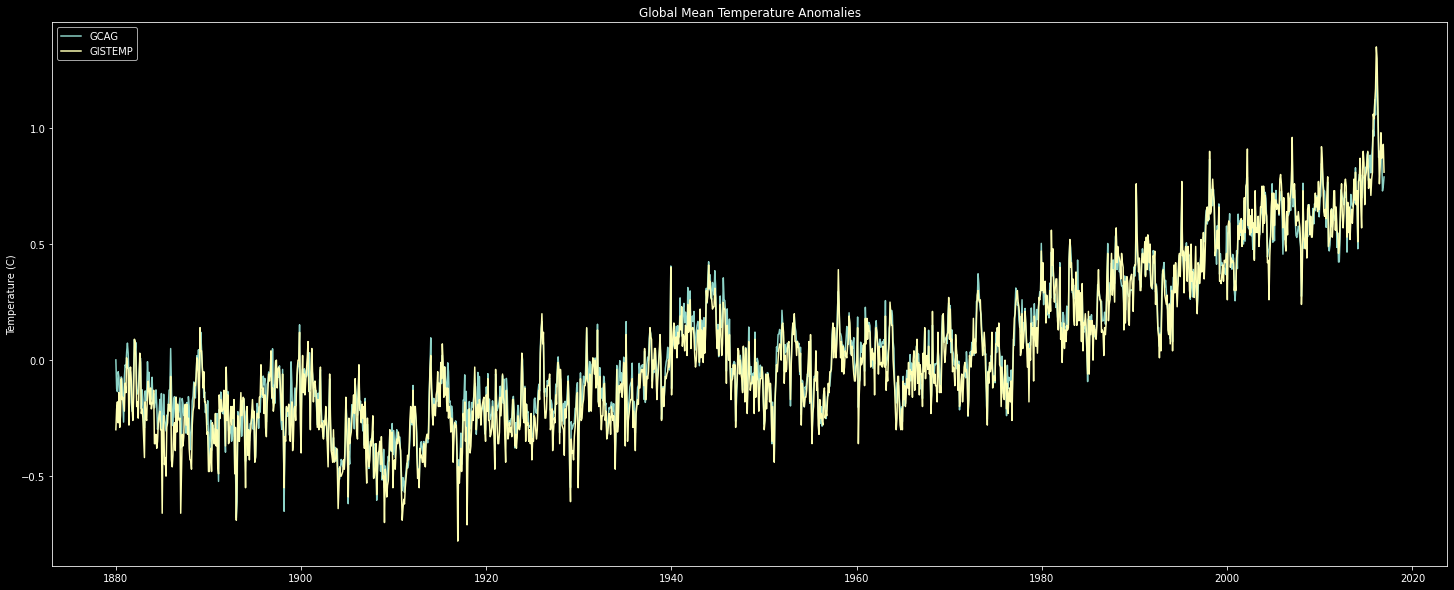

In [25]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(gcag.Date, gcag.Mean)
ax.plot(gistemp.Date, gistemp.Mean)
ax.legend(['GCAG','GISTEMP'])
plt.ylabel("Temperature (C)")
plt.title("Global Mean Temperature Anomalies")
plt.show()

## Exercise 1: 

#### Read the global CO2 emmisions dataset but this time make an Area Plot showing the increase in CO2 emission each year.

File is called `co2-gr-gl_csv.csv`

#### An Area Plot is the same as a Line Plot but it has the area under the curve painted.

To create an area plot in matplotlib use `ax.fill_between(x_data, base_line, y_data)`. This method will paint the area under the curve from base:

### Subplots

We can have more than one plot per figure in matplotlib. This can be helpful to plot data that is similar and compare. Lets make a plot using the temperature, glacier volume and sea level datasets.

In [33]:
glaciers = pd.read_csv("https://raw.githubusercontent.com/dirodriguezm/practicas_diploma/master/Practica1/glaciers_csv.csv")
glaciers.head()

,Year,Mean cumulative mass balance,Number of observations
0,1945,0.00,NaN
1,1946,-1.13,1.0
2,1947,-3.19,1.0
3,1948,-3.19,1.0
4,1949,-3.82,3.0


In [34]:
sea_level = pd.read_csv("https://raw.githubusercontent.com/dirodriguezm/practicas_diploma/master/Practica1/epa-sea-level_csv.csv")
sea_level.Year = pd.to_datetime(sea_level.Year)
sea_level.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN


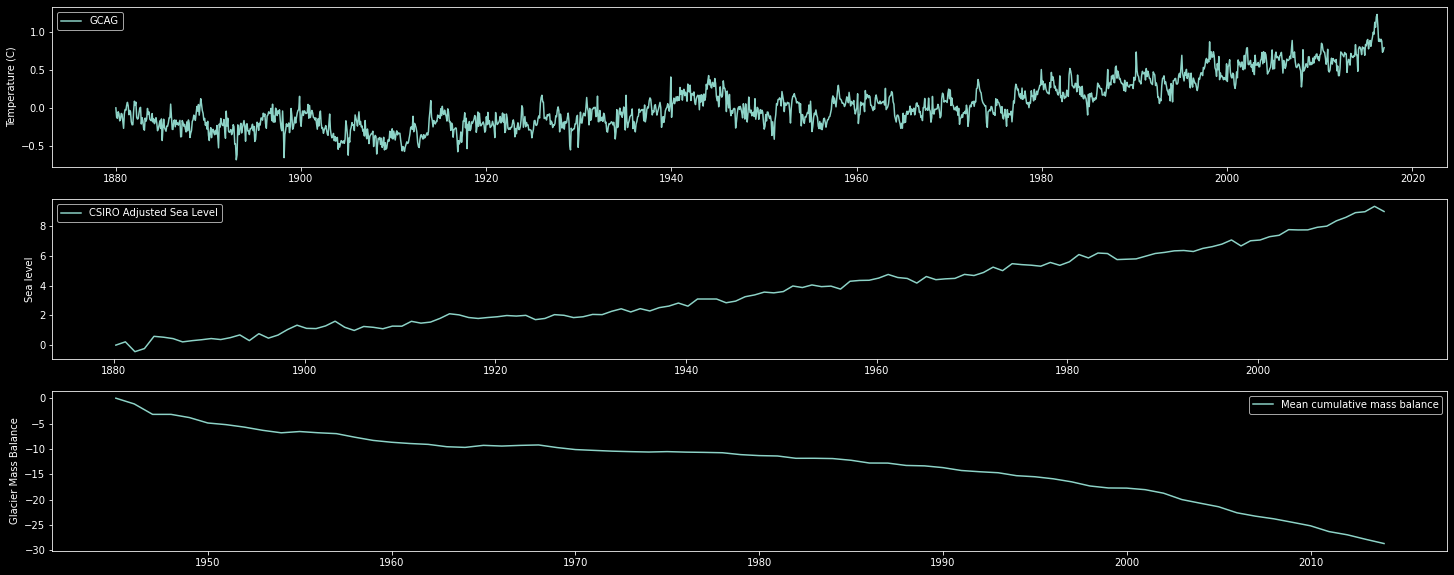

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(25, 10))
ax1.plot(gcag.Date, gcag.Mean)
ax1.legend(['GCAG'])
ax1.set_ylabel("Temperature (C)")
ax2.plot(sea_level.Year, sea_level["CSIRO Adjusted Sea Level"])
ax2.set_ylabel("Sea level")
ax2.legend(['CSIRO Adjusted Sea Level'])
ax3.plot(glaciers.Year, glaciers["Mean cumulative mass balance"])
ax3.legend(['Mean cumulative mass balance'])
ax3.set_ylabel("Glacier Mass Balance")
plt.show()

## Exercise 2:

#### Add CO2 emissions to the previous plot below glacier mass balance

### Double Y-axis plot

We can have two x-axis or y-axis on the same plot. This could be useful for comparing data that shares the same axis or to display different scales for a variable, like logaritmic scales, degree and radians, etc.

To create a double Y axis plot we use the `twinx()` function, that creates a twin axis that shares the x-axis.

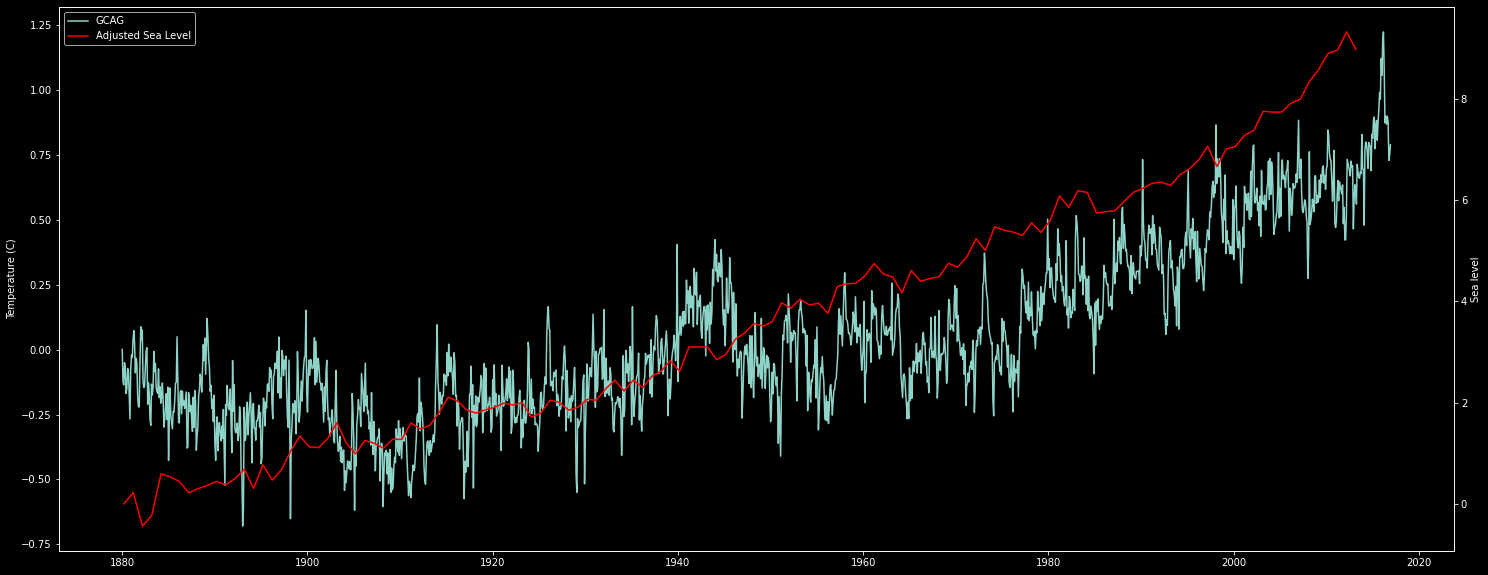

In [36]:
fig, ax1 = plt.subplots(figsize=(25, 10))
line1 = ax1.plot(gcag.Date, gcag.Mean)
ax1.set_ylabel("Temperature (C)")
ax2 = ax1.twinx()
line2 = ax2.plot(sea_level.Year, sea_level["CSIRO Adjusted Sea Level"], 'r')
ax2.set_ylabel("Sea level")
ax2.legend(line1+line2,['GCAG', 'Adjusted Sea Level'])

### Histograms

Histograms are a kind of bar plot that shows frequencies of a variable. It is used to show distributions and helps us to better understand our data.

For this example lets use another dataset having total emissions of CO2 by country. File is called `nation.1751_2014.csv`

In [37]:
co2 = pd.read_csv("https://raw.githubusercontent.com/dirodriguezm/practicas_diploma/master/Practica1/nation.1751_2014.csv")
co2.head()

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,1949.0,4.0,4.0,0.0,0.0,0.0,NaN,NaN,0.0
4,AFGHANISTAN,1950.0,23.0,6.0,18.0,0.0,0.0,0.0,0.0,0.0


In this example we are going to plot the histogram of CO2 emissions of all countries for year 2014. So first we need to filter our dataframe to only contain year 2014.

In [38]:
year2014 = co2[co2.Year == 2014]

Text(0.5, 0, 'CO2 Emissions (Tons x1000)')

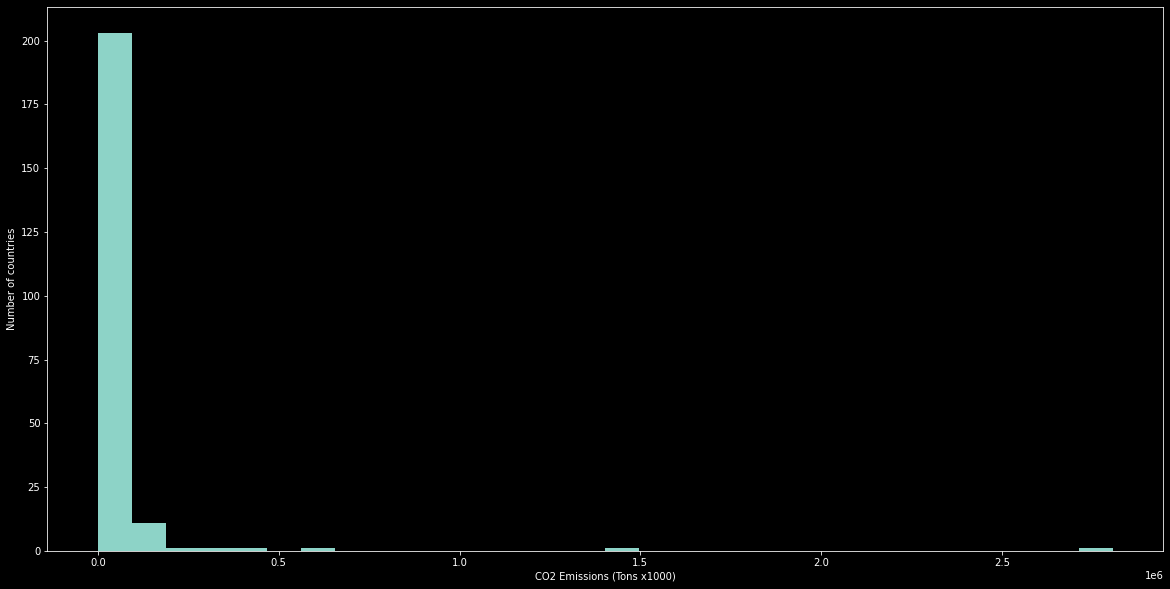

In [39]:
plt.figure(figsize=(20,10))
plt.hist(year2014["Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)"], bins=30)
plt.ylabel("Number of countries")
plt.xlabel("CO2 Emissions (Tons x1000)")

## Exercise 3

Create a histogram from the per capita emissions for each country for a year of your choosing. Play with the bin number to see what it means.